# Predicting the stage of Lung Cancer

## About the dataset:
This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring.

## Objective of the Analysis:
- Predicting the likelihood of a patient developing lung cancer.
- Predicting the stage of the Cancer.
- identifying risk factors for lung cancer.

### Step 1: Importing the necessary libraries and loading the dataset

In [1]:
# Importing necessary libraries and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

df = pd.read_csv(r"D:\Documents\Projects\ML\DataSets\cancer patient data sets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### Step 2: Exploratory data analysis

In [2]:
#Looking at the columns and data
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,1,5,Medium


In [3]:
# Checking duplicate values:
df.duplicated().value_counts()
# The data has no duplicate values

False    1000
dtype: int64

In [4]:
# Droping useless columns
df.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df.head(10)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
5,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
6,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
7,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,Low
8,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,Medium
9,46,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,1,5,Medium


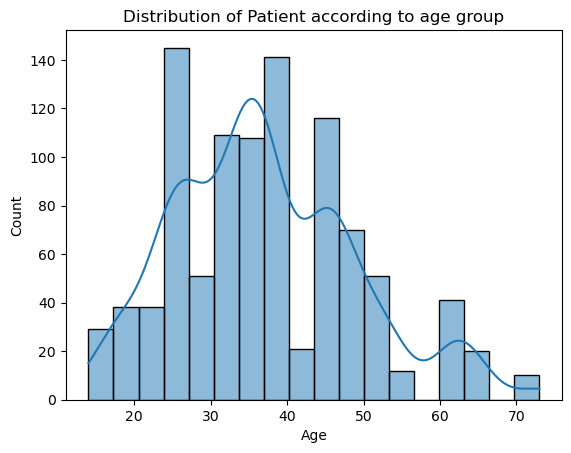

In [5]:
fig1 = sns.histplot(data=df, x='Age', kde=True)
fig1.set_title('Distribution of Patient according to age group');

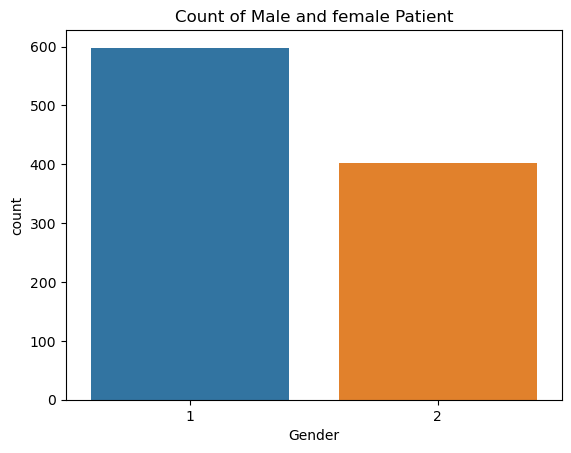

In [6]:
fig3 = sns.countplot(data=df, x='Gender')
fig3.set_title('Count of Male and female Patient');

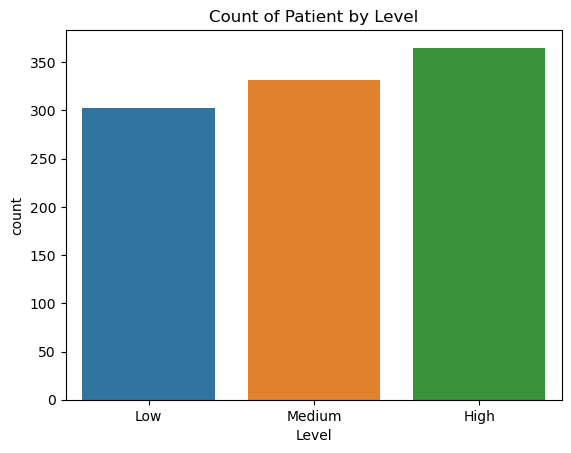

In [7]:
fig4 = sns.countplot(data=df, x='Level')
fig4.set_title("Count of Patient by Level");

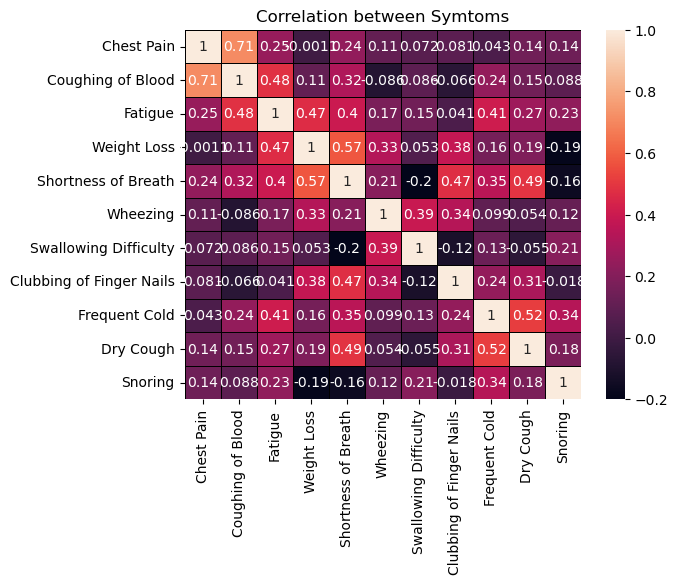

In [8]:
corr_symtoms = df[['Chest Pain','Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring']].corr()
fig2 = sns.heatmap(data=corr_symtoms, annot=True, linewidth=0.5, linecolor='black')
fig2.set_title('Correlation between Symtoms');

In [9]:
#Converting Level of cancer into number for better learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Level"] = le.fit_transform(df['Level'])

#Printing values
print(f' Low: {le.transform(["Low"])}, Medium: {le.transform(["Medium"])} and High: {le.transform(["High"])}')

 Low: [1], Medium: [2] and High: [0]


### Step 4: Setting up variable

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

### Step 3: Spliting the model into training and test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

### Step 4: Model Creation
- Decision Tree

#### Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

cf = DecisionTreeClassifier()

#Training the model
cf.fit( X_train, y_train )

#Predicting the outcomes
y_predict = cf.predict(X_test)

#### Finding the accuracy of Decision Tree Model

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
print(f'Accuracy of the Decision Tree Model is {round(accuracy*100, 2)}')

Accuracy of the Decision Tree Model is 100.0


*We are able to achive the accuracy of 100% with this model.*